We have seen some basic datatypes in Python, but now we want to look at more complicated data structures that often form the backbone of computational physics.  First, a reminder of the ball drop input -

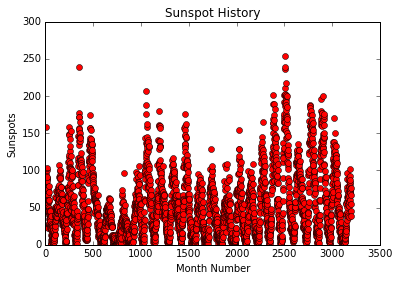

In [17]:
# %load code/readcsv3.py
%matplotlib inline
import csv
import matplotlib.pyplot as plt

data = csv.reader(open('spot_num.txt', 'r'), skipinitialspace=True, delimiter=" ", quotechar='"')
myyear, mymon, numspots, std = [], [], [], []

data.__next__()
for row in data:
    myyear.append(float(row[0]))
    mymon.append(float(row[1]))
    numspots.append(float(row[2]))
    std.append(float(row[3]))

plt.plot(numspots,'ro')
plt.xlabel('Month Number')
plt.ylabel('Sunspots')
plt.title('Sunspot History')
plt.show()


We can use the "type" command to find out the nature of the column variables being plotted.

In [18]:
type(numspots)

list

A list is a basic datatype in Python, being an ordered set of comma separated, heterogeneous values between square brackets. They are indexed by integers, starting with 0. For example - 

In [9]:
mylist=['hi there', 47.2, 0, 'humdinger', 2.3e45, True]

In [12]:
mylist

['hi there', 47.2, 0, 'humdinger', 2.3e+45, True]

In [26]:
mylist[3]

'humdinger'

Basic Python also has a numeric array type, which must be a homogeneous list of numeric values. More relevant to scientific computer, however, is the array type defined in the Numpy package.  Numpy is the fundamental package in Python for performing numerical computations. Numpy may be installed using any package manager, and general information can be found at 

https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

Numpy's forte is the use of multi-dimensional, homegeneous, numeric arrays.  In addition, Numpy includes many functions that can be used on the arrays, often optimized for speed.  For example, let us modify the sunspot reading program to use numpy arrays and csv reading capability.  We will input the data in two ways . .  . . . .

In [41]:
import numpy as np
#import matplotlib.pyplot as plt
mydata = np.loadtxt('spot_num.txt', skiprows=1)
#above gets all data as 2d array
x,y,z = np.loadtxt('spot_num.txt', skiprows=1,usecols=(0,1,2),unpack=True)
#this gets only the first three columns (usecols) and sets equal to three 1d arrays (unpack)
type(mydata)

numpy.ndarray

In [36]:
mydata.shape #len(mydata)

(3196, 4)

Indexing of multi-dimensional arrays is performed with integer indices separated by commas within square brackets.  A two-dimension array, the first index is the row, the second the column.

In [38]:
mydata[1000,3]

15.9

In [42]:
type(x)

numpy.ndarray

In [43]:
x.shape

(3196,)

Now let us use this to do a better plot of sunspots, where we use the for loop with a counter and calculate decimal months

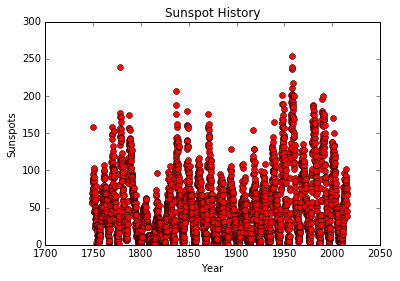

In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
spots = np.loadtxt('spot_num.txt', skiprows=1)
#above gets all data as 2d array
nspots=spots.shape[0] #how many data points?
decdate=np.zeros(nspots)
for i in range(nspots):
    decdate[i] = spots[i,0] + (spots[i,1]-0.5)/12.      
plt.plot(decdate,spots[0:,2],'ro')  #the : means use all indices, can be used for formal range
plt.xlabel('Year')
plt.ylabel('Sunspots')
plt.title('Sunspot History')
plt.show()

In [48]:
np.zeros(2)

array([ 0.,  0.])

Note that we do not have to use the for loop.  Numpy arrays are often used in a vectorized mode where mathematical formula can apply on an element by element basis.  For instance, we could have created the decdate as above with a single line -

In [70]:
decdate2=spots[:,0] + (spots[:,1]-0.5)/12.

In [71]:
decdate2

array([ 1749.04166667,  1749.125     ,  1749.20833333, ...,  2015.125     ,
        2015.20833333,  2015.29166667])

We will explore much more with numpy as we go through the semester.   One final datatype worth noting is dataframes.  Advanced datatypes such as these are extremely useful.  It is almost like having the cells of an excel spreadsheet in memory.  For dataframes, one needs to load yet another package called Pandas.

In [93]:
import pandas as pd
import numpy as np
spotstr = pd.read_csv('spot_num.txt',header=0,delim_whitespace=True,skipinitialspace=True)
#above gets all data as 2d array#this gets only the first three columns (usecols) and sets equal to three 1d arrays (unpack)
type(spotstr)

pandas.core.frame.DataFrame

In [100]:
spotstr

,YEAR,MON,SSN,DEV
0,1749,1,58.0,24.1
1,1749,2,62.6,25.1
2,1749,3,70.0,26.6
3,1749,4,55.7,23.6
4,1749,5,85.0,29.4
5,1749,6,83.5,29.2
6,1749,7,94.8,31.1
7,1749,8,66.3,25.9
8,1749,9,75.9,27.7
9,1749,10,75.5,27.7


Depending on the datatypes and options, you can think of a dataframe as being a big table of heterogeneous data, indexed by a string (like an associative array or hash table).  In our case, for instance, the ['MON'] refers to the month data series - 

In [103]:
spotstr['MON'][0:20]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12     1
13     2
14     3
15     4
16     5
17     6
18     7
19     8
Name: MON, dtype: int64

In [105]:
type(spotstr['MON'])

pandas.core.series.Series

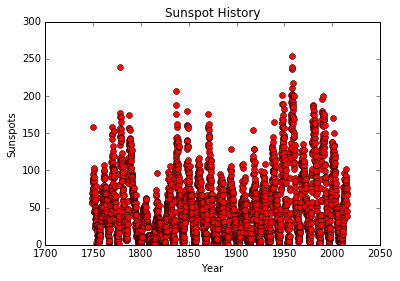

In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
newdate = spotstr['YEAR'] + (spotstr['MON']-0.5)/12.      
plt.plot(newdate,spotstr['SSN'],'ro')  #the : means use all indices, can be used for formal range
plt.xlabel('Year')
plt.ylabel('Sunspots')
plt.title('Sunspot History')
plt.show()